In [1]:
import numpy as np
import pandas as pd
import difflib
import json

import networkx as nx
import warnings
import matplotlib.pyplot as plt
import powerlaw
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [2]:
G = nx.read_edgelist('network_07_12_2020_18_00.csv', data=(('weight',int),('industry',int)), delimiter=",")

In [3]:
# G = nx.read_edgelist('network01/48(07_12_2020).csv', data=(('weight', int),) , delimiter=",")

In [4]:
NNODES = G.number_of_nodes()
NNODES

NEDGES = G.number_of_edges()
NEDGES

LMAX = (NNODES * NNODES - 1) / 2

print("Number of Nodes: ", NNODES)
print("Number of Edged: ", NEDGES)
print("LMAX: ", LMAX)

Number of Nodes:  14875
Number of Edged:  43932
LMAX:  110632812.0


# Centrality Analysis

In [5]:
def draw_top_n(dictionary, n):
    lista = [(k, v) for k, v in dictionary.items()]
    lista.sort(key=lambda x:x[1], reverse = True)
    topn = lista[:n]
    
    x = []
    y = []
    
    print(topn)

    for el in topn:
        x.append(el[0])
        y.append(el[1])
        
    plt.figure(figsize=(20,5))
    plt.bar(x, y, color='g')

    plt.xticks(rotation=45)

    plt.show()

### Degree Centrality

In [6]:
degree_centrality = nx.degree_centrality(G)

[('FREELANCE', 0.05223880597014925), ('ACCENTURE', 0.05069248352830442), ('GRUPPO GENERALI SPA', 0.03825467258303079), ('PWC SPA', 0.03778405270942584), ('DELOITTE', 0.033414011025951325), ('GRUPPO INTESA SANPAOLO', 0.0326744655102864), ('VODAFONE SPA', 0.02924566357402178), ('REPLY SPA', 0.027363184079601987), ('EY SPA', 0.026287481511362107), ('KPMG SPA', 0.0245394648379723), ('AMAZON', 0.021312357133252652), ('UNIVERSITA LUIGI BOCCONI', 0.020034960333467796), ('WIND TRE SPA', 0.018757563533682936), ('TELECOM SPA', 0.018286943660077985), ('UNICREDIT GROUP', 0.01808524942853301), ('ALLIANZ GROUP', 0.01808524942853301), ('GRUPPO BNP PARIBAS', 0.0163372327551432), ('IBM COMPANY', 0.016270001344628207), ('AXA ASSICURAZIONI SPA', 0.015933844292053245), ('POLITECNICO DI MILANO', 0.015395993007933305)]


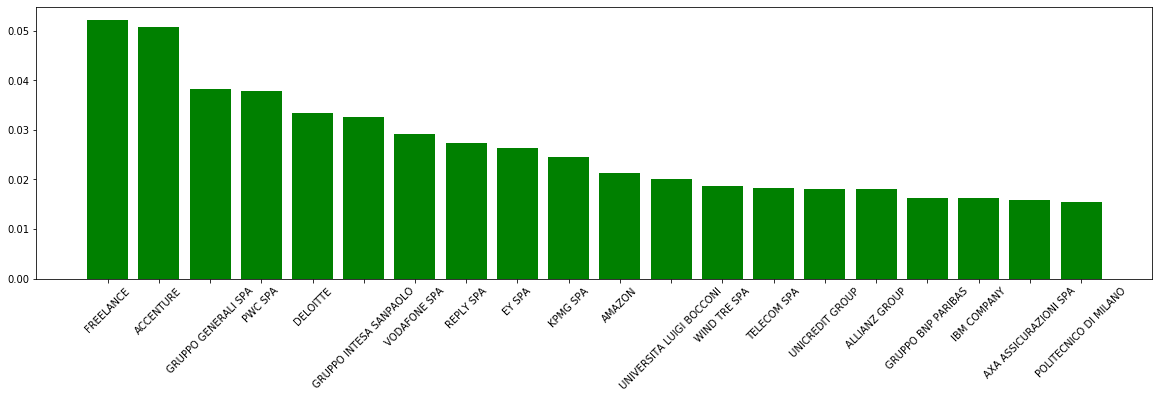

In [19]:
draw_top_n(degree_centrality, 20)

### Connectivity Based Centrality

In [8]:
# DA FARE UN SAFE RUN DOVUTE LE MAX ITER in un try catch che ad ogni fail raddoppia le max iter

In [9]:
eigenvector_centrality = nx.eigenvector_centrality(G, weight='weight', max_iter=1000)

[('ACCENTURE', 0.34731128640555786), ('GRUPPO INTESA SANPAOLO', 0.280918317413094), ('DELOITTE', 0.2714162723093535), ('PWC SPA', 0.2628846183510962), ('GRUPPO GENERALI SPA', 0.22763342580679644), ('UNICREDIT GROUP', 0.2127865932560887), ('EY SPA', 0.20228617646154698), ('KPMG SPA', 0.18558904775684495), ('REPLY SPA', 0.16760670311894366), ('UNICREDIT BANCA', 0.1634146587563869), ('BANCA FIDEURAM', 0.15803376910075326), ('VODAFONE SPA', 0.1400248217420704), ('WIND TRE SPA', 0.13407889810939627), ('FINECO', 0.12474193909175035), ('FREELANCE', 0.1246400162852849), ('BIP - BUSINESS INTEGRATION PARTNERS', 0.12123421408713499), ('ALLIANZ GROUP', 0.11665995318069514), ('DEUTSCHE BANK', 0.11288651626641732), ('BANCA IMI SPA', 0.10938407052513269), ('CAPGEMINI SPA', 0.10918475476464767)]


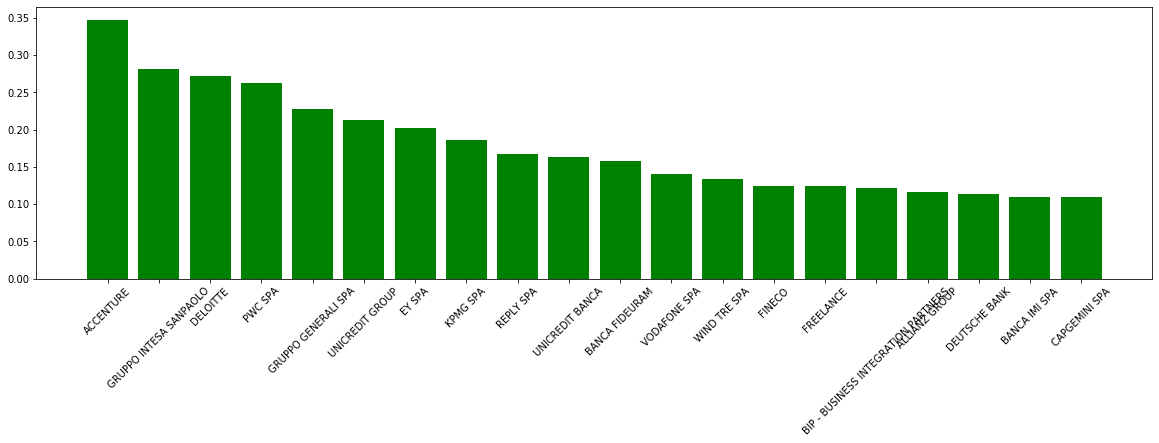

In [53]:
draw_top_n(eigenvector_centrality, 20)

In [11]:
pagerank_centrality = nx.pagerank(G, weight='weight')

[('ACCENTURE', 0.009940414690504374), ('FREELANCE', 0.007865647955549965), ('GRUPPO GENERALI SPA', 0.007027447380080499), ('GRUPPO INTESA SANPAOLO', 0.006612874119494975), ('PWC SPA', 0.006367856835946147), ('DELOITTE', 0.005762601879501039), ('VODAFONE SPA', 0.005185500570948971), ('REPLY SPA', 0.004549474947351779), ('WIND TRE SPA', 0.004146796637625154), ('EY SPA', 0.0041101033115016694), ('KPMG SPA', 0.003848850842882281), ('UNICREDIT GROUP', 0.0036731121764257816), ('TELECOM SPA', 0.0036522040234499447), ('AMAZON', 0.0031275352211354857), ('ALLIANZ GROUP', 0.0030038937164910597), ('UNIPOLSAI ASSICURAZIONI - GRUPPO UNIPOL', 0.002888404757211641), ('TIM SPA', 0.0026681773580562325), ('UNIVERSITA LUIGI BOCCONI', 0.0026187202738352615), ('RANDSTAD', 0.002540119635513527), ('BANCA FIDEURAM', 0.0025376902052530806)]


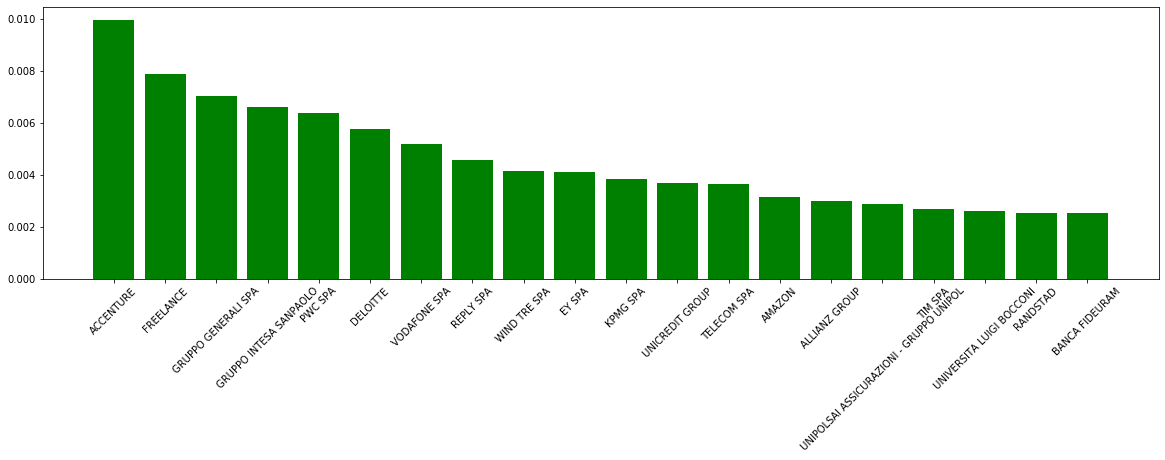

In [50]:
draw_top_n(pagerank_centrality, 20)

### Geometric Centrality

In [13]:
closeness_centrality = nx.closeness_centrality(G)

[('FREELANCE', 0.36767032462509447), ('ACCENTURE', 0.3673460783582112), ('PWC SPA', 0.3507382952962233), ('DELOITTE', 0.34677394518769117), ('GRUPPO GENERALI SPA', 0.34576646070355604), ('EY SPA', 0.34078341982872196), ('VODAFONE SPA', 0.3406226476539325), ('GRUPPO INTESA SANPAOLO', 0.34030155796250694), ('REPLY SPA', 0.3396931523165668), ('KPMG SPA', 0.3365265391261197), ('AMAZON', 0.32995451610629084), ('UNICREDIT GROUP', 0.32730203639145283), ('CAPGEMINI SPA', 0.3238278041549092), ('IBM COMPANY', 0.3234506191845648), ('BIP - BUSINESS INTEGRATION PARTNERS', 0.3230839498271765), ('WIND TRE SPA', 0.32300686218368524), ('POSTE ITALIANE SPA', 0.32268926411288906), ('AXA ASSICURAZIONI SPA', 0.3199248813114966), ('TELECOM SPA', 0.3196982253559093), ('POLITECNICO DI MILANO', 0.31950959057578426)]


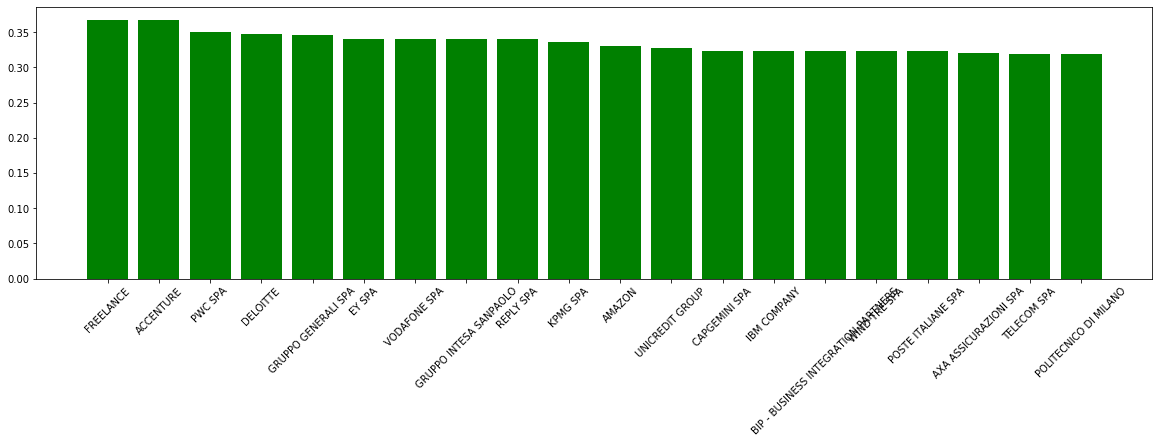

In [45]:
draw_top_n(closeness_centrality, 20)

In [15]:
harmonic_centrality = nx.harmonic_centrality(G)

[('FREELANCE', 5982.899999998885), ('ACCENTURE', 5967.199999998856), ('PWC SPA', 5693.399999998735), ('GRUPPO GENERALI SPA', 5633.309523808401), ('DELOITTE', 5618.149999998876), ('GRUPPO INTESA SANPAOLO', 5524.766666665759), ('VODAFONE SPA', 5506.216666665774), ('EY SPA', 5499.533333332443), ('REPLY SPA', 5486.116666665808), ('KPMG SPA', 5430.899999999261), ('AMAZON', 5309.076190475697), ('UNICREDIT GROUP', 5263.216666666271), ('CAPGEMINI SPA', 5194.842857142593), ('WIND TRE SPA', 5189.616666666442), ('IBM COMPANY', 5188.766666666427), ('BIP - BUSINESS INTEGRATION PARTNERS', 5178.516666666452), ('POSTE ITALIANE SPA', 5166.266666666471), ('TELECOM SPA', 5138.599999999894), ('AXA ASSICURAZIONI SPA', 5138.326190476072), ('GRUPPO BNP PARIBAS', 5136.359523809418)]


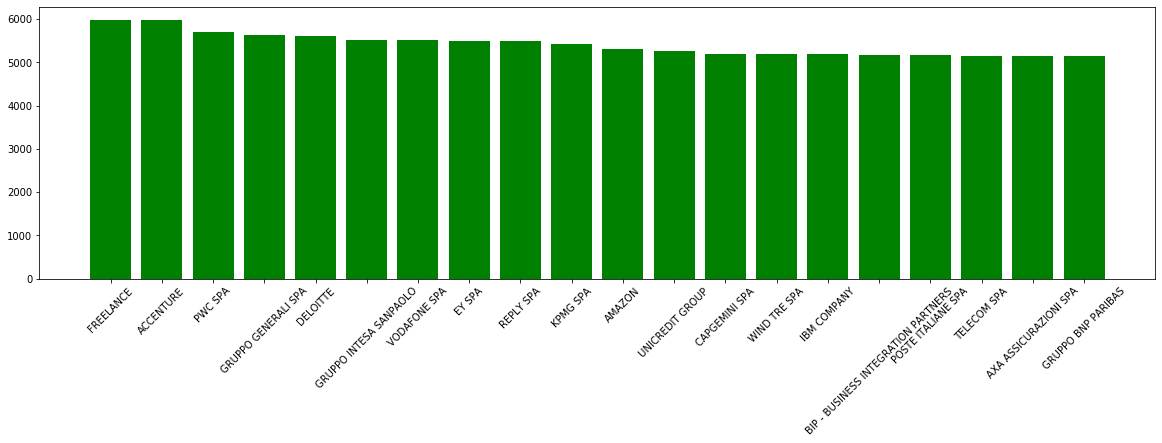

In [49]:
draw_top_n(harmonic_centrality, 20)

In [17]:
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

[('FREELANCE', 0.08034355675944323), ('ACCENTURE', 0.04806268829954788), ('GRUPPO GENERALI SPA', 0.034439587113204835), ('PWC SPA', 0.031996798749579065), ('VODAFONE SPA', 0.029798832938526608), ('DELOITTE', 0.029482366147293052), ('REPLY SPA', 0.024033519201609427), ('EY SPA', 0.02381698552711867), ('GRUPPO INTESA SANPAOLO', 0.022027191941623274), ('AMAZON', 0.022015217802518975), ('KPMG SPA', 0.020535301693345265), ('TELECOM SPA', 0.018171976191247673), ('UNIVERSITA LUIGI BOCCONI', 0.01729682978865349), ('WIND TRE SPA', 0.01694320014584934), ('POLITECNICO DI MILANO', 0.01670586221567171), ('BIP - BUSINESS INTEGRATION PARTNERS', 0.015446256727848174), ('TIM SPA', 0.015112947154314028), ('YOOX NET-A-PORTER GROUP', 0.01482313300119334), ('IBM COMPANY', 0.014803579005454258), ("UNIVERSITÀ DEGLI STUDI DI ROMA 'LA SAPIENZA'", 0.014612431257860808)]


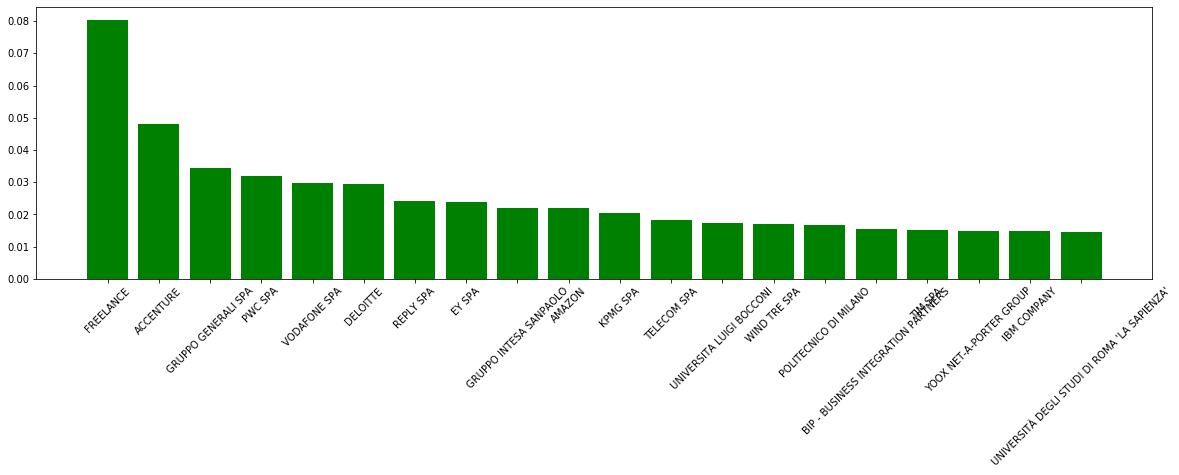

In [48]:
draw_top_n(betweenness_centrality, 20)

In [54]:
H = G.subgraph(['ACCENTURE','FREELANCE','PWC SPA','GRUPPO GENERALI SPA','GRUPPO INTESA SANPAOLO', 'DELOITTE', 'PWC SPA', 'VODAFONE SPA', 'REPLY SPA', 'EY SPA', 'KPMG SPA', 'AMAZON', 'UNIVERSITA LUIGI BOCCONI', 'WIND TRE SPA'])
nx.write_gexf(H, "test.gexf")